In [2]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label


    def __repr__(self):   # This basically allows us to print nicer looking expressions for the final output
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [17]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d= e + c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L

Value(data=-8.0)

In [7]:
from graphviz import Digraph

def trace(root):
    #Builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) #LR == Left to Right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #For any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % ( n.label, n.data, n.grad), shape='record')
        if n._op:
            #If this value is a result of some operation, then create an op node for it
            dot.node(name = uid + n._op, label=n._op)
            #and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        #Connect n1 to the node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

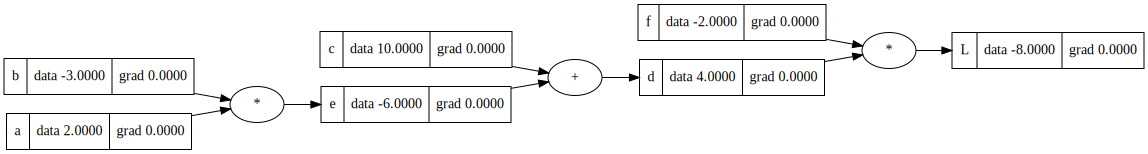

In [ ]:
draw_dot(L)

----------------------

### **Now, let's start to fill those grad values**

--------------

**Let's first find the derivative of L w.r.t L**

In [6]:
#This is just a staging function to show how the calculation of each of the derivative is taking place
def lol():

  h = 0.001

  #Here we are basically making them as local variables, to not affect the global variables on top
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label='e'
  d= e + c; d.label='d'
  f = Value(-2.0, label='f')
  L = d*f; L.label='L'
  L1 = L.data #L is basically a node, so we need its data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label='e'
  d= e + c; d.label='d'
  f = Value(-2.0, label='f')
  L = d*f; L.label='L'
  L2 = L.data + h

  print((L2-L1)/h)

lol()

1.000000000000334


This was theoritically obvious as well. The derivitive of L wrt L will be one.

&nbsp;

So, lets add that value manually. (Remember to run the global variables for this)

In [10]:
L.grad = 1.0

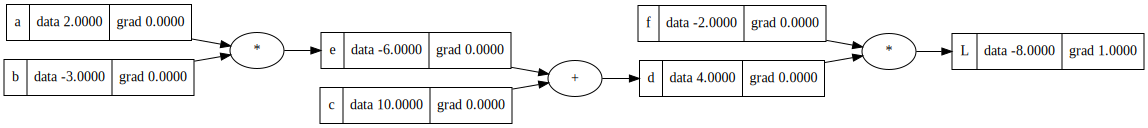

In [11]:
draw_dot(L)

-----------

**Now, we find the derivative of L wrt to f and d**

So, mathematically:

dL/dd = ?

**L = d * f**

Therefore, dL/dd = f

If we do manual calculation to verify,           \

=> f(x+h) - f(x) / h                                \

(Remember the f(x) is basically L here)          \
=> (d+h)*f - d*f / h                                \
=> df + hf - df / h                                 \
=> hf/h                                             \
= f


So here if you see,

The derivative of L wrt f is the value in d \
& \
The derivative of L wrt d is the value in f

So, grad f is 4.0 \
and grad d is -2.0

&nbsp;

Lets check this in code!

In [12]:
# STARTING WITH d

#This is just a staging function to show how the calculation of each of the derivative is taking place
def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label='e'
  d= e + c; d.label='d'
  f = Value(-2.0, label='f')
  L = d*f; L.label='L'
  L1 = L.data #L is basically a node, so we need its data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label='e'
  d= e + c; d.label='d'
  d.data = d.data + h
  f = Value(-2.0, label='f')
  L = d*f; L.label='L'
  L2 = L.data

  print((L2-L1)/h)

lol()

-2.000000000000668


In [15]:
# NOW WITH f

#This is just a staging function to show how the calculation of each of the derivative is taking place
def lol():

  h = 0.00001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label='e'
  d= e + c; d.label='d'
  f = Value(-2.0, label='f')
  L = d*f; L.label='L'
  L1 = L.data #L is basically a node, so we need its data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label='e'
  d= e + c; d.label='d'
  f = Value(-2.0 + h, label='f')
  L = d*f; L.label='L'
  L2 = L.data

  print((L2-L1)/h)

lol()

4.000000000026205


So, now that we have verified that mathematically and on our code. Lets manually add those variables to the graph

In [19]:
f.grad = 4.0
d.grad = -2.0

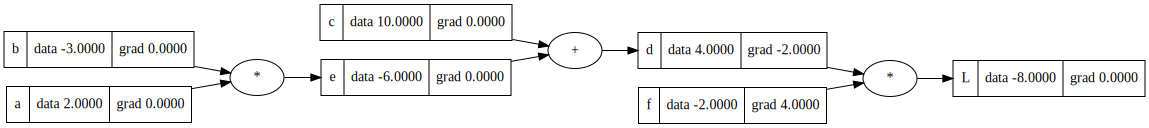

In [20]:
draw_dot(L)